In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

np.random.seed(0)

In [2]:
from ranker import BFSScraper, CustomStemmer, BubbleChart, Ranker, User # Code written by us it is documented in file ranker.py

### Downloading documents from Wikipedia
Starting from the `Jazz` page. We gather 1500 documents. Additionally on every page visit at most 10 unique pages to get more diversity.

In [5]:
bfs_scrap = BFSScraper(n_to_visit=10)
bfs_scrap.bfs('https://en.wikipedia.org/wiki/Jazz', 1500)

1500 sites already collected: : 1907it [55:57,  1.76s/it]


In [6]:
bfs_scrap.generate_summary() # Generate summary that shows how wikipedia was traversed by scraper

In [7]:
bfs_scrap.generate_csv() # Generate csv with scraped data

### Preprocessing data

In [3]:
texts = pd.read_csv('text.csv', index_col=0).T
texts.head()

,content,num_of_links,selected_links
https://en.wikipedia.org/wiki/Jazz,\nJazz is a music genre that originated in the...,863,['https://en.wikipedia.org/wiki/Kansas_City_ja...
https://en.wikipedia.org/wiki/Kansas_City_jazz,Kansas City jazz is a style of jazz that devel...,236,"['https://en.wikipedia.org/wiki/Ragtime', 'htt..."
https://en.wikipedia.org/wiki/Gary_Burton,"\nGary Burton (born January 23, 1943)[1] is an...",133,['https://en.wikipedia.org/wiki/Stephane_Grapp...
https://en.wikipedia.org/wiki/October_Revolution_in_Jazz,The October Revolution in Jazz was a four-day ...,45,"['https://en.wikipedia.org/wiki/Bill_Dixon', '..."
https://en.wikipedia.org/wiki/Minstrel_show,"\nThe minstrel show, also called minstrelsy, w...",254,"['https://en.wikipedia.org/wiki/Tall_tale', 'h..."


In [6]:
stemmer = CustomStemmer()
preprocessed = stemmer.process_corpus(texts)

In [7]:
stemmer.generate_csv(preprocessed)

All files available [here](https://drive.google.com/drive/folders/1FkuFF7tCvBj8pTVDtOtFXtfSUOH7a2vw?usp=sharing), as git doesn't support so large files 

## Visualization of data

Violing showing distribution of number of links on wikipedia pages. We can clearly see that most pages have rather small amount of links, but some have enourmous.

We've additionally plotted all points so that you can hover on it and see which page has how many links.

In [12]:
texts_reset_id = texts.reset_index().astype({"num_of_links": "uint32"})
px.violin(texts_reset_id, 
          x="num_of_links", 
          title="Distribution of number of links on wikiedia starting traversal from Jazz",
          labels= {"num_of_links": "Number of links on a page"},
          points='all',
          hover_data=["index"],
          range_x=[0,texts_reset_id.num_of_links.max()+50])

In [9]:
data = pd.read_csv('processed.csv', index_col=0)
data.head()

,text
https://en.wikipedia.org/wiki/Jazz,Jazz music genre originated communities New Or...
https://en.wikipedia.org/wiki/Kansas_City_jazz,Kansas City jazz style jazz developed Kansas C...
https://en.wikipedia.org/wiki/Gary_Burton,Gary Burton born January American jazz vibraph...
https://en.wikipedia.org/wiki/October_Revolution_in_Jazz,October Revolution Jazz festival new jazz musi...
https://en.wikipedia.org/wiki/Minstrel_show,minstrel show also called minstrelsy American ...


In [10]:
words = [text.split() for text in data['text']]
words = [
    word for document in words for word in document]


### Top 10 most occured words

In [11]:
from collections import Counter

counter = Counter(words)
for pair in counter.most_common(10):
    print(f'{pair[0]}: {pair[1]}')

music: 12903
also: 8741
first: 7072
jazz: 6359
one: 5856
New: 5731
album: 5208
band: 4558
American: 4276
time: 4065


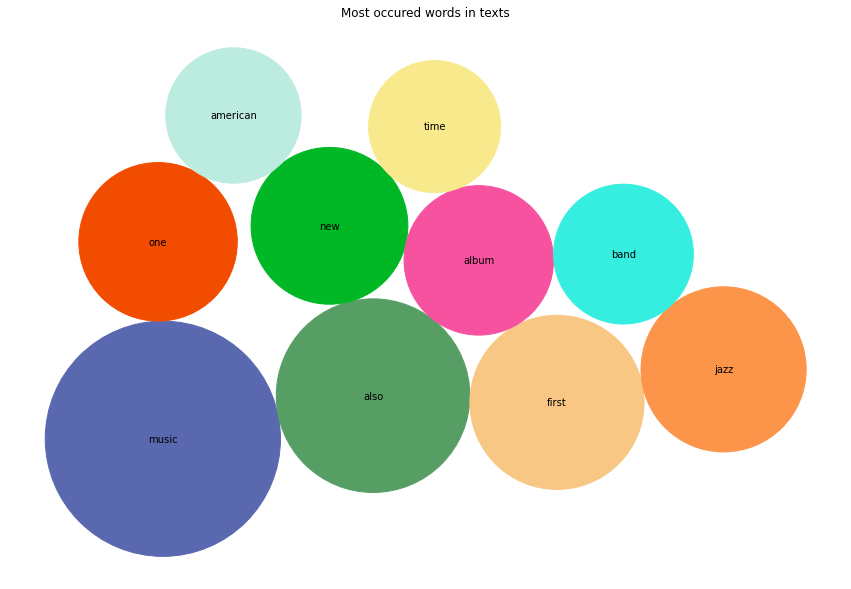

In [12]:
bubble_chart = BubbleChart(area=[x[1] for x in counter.most_common(10)],
                           bubble_spacing=0.1)

bubble_chart.collapse()

fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(15, 15))
colors = ['#5A69AF', '#579E65', '#F9C784', '#FC944A', '#F24C00', '#00B825',
          '#F652A0', '#36EEE0', '#BCECE0', '#F8EA8C']
bubble_chart.plot(
    ax, cols, colors)
ax.axis("off")
ax.relim()
ax.autoscale_view()
ax.set_title('Most occured words in texts')
ax.set
plt.rcParams.update({'font.size': 10})
plt.show()

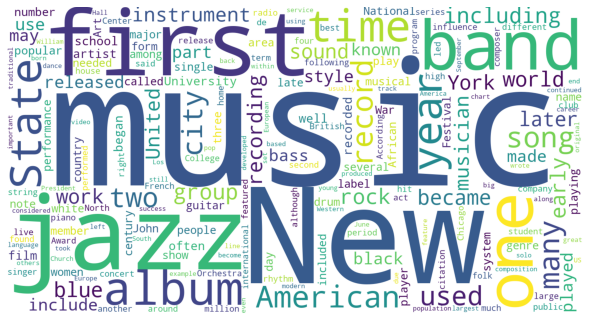

In [28]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1500, height=800,
                      background_color='white',
                      collocations=False,
                      min_font_size=10).generate("".join([(x[0]+' ')*x[1] for x in counter.most_common(1000)]))

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


### Co-occurances

Of words starting with a, b or c. Not enough memory to show more...

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

CountVec = CountVectorizer()
CountData = CountVec.fit_transform(data['text'])
 
wordsM = (CountData.T)@CountData

In [49]:
# slicing just to show, that such plot is possible
# to make co-occurances for the whole array we'd need 41GiB memory 
df = pd.DataFrame(wordsM[100:20000, 100:20000].toarray(),
                  columns=CountVec.get_feature_names_out()[100:20000], index=CountVec.get_feature_names_out()[100:20000])
df.head()

,abdulaziz,abdulhamit,abdullah,abe,abeille,abel,abelardo,abelha,abelian,abels,...,drums,drumsanywhere,drumset,drumstick,drumsticks,drunk,drunkard,drunkards,drunken,drunkenness
abdulaziz,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abdulhamit,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
abdullah,0,0,45,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,0,0
abe,0,0,0,13,0,0,0,0,0,0,...,7,0,0,0,0,0,0,0,0,0
abeille,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
import networkx as nx
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import nxviz as nv
from nxviz import annotate
import random


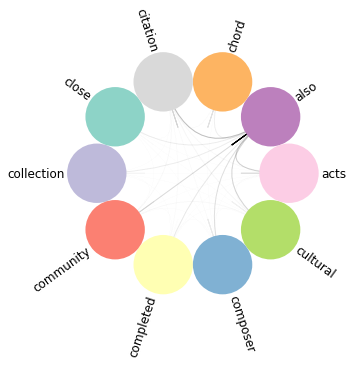

In [54]:
cols = [x[0].lower() for x in counter.most_common(1000) if x[0][0] in ['a', 'b', 'c']]
random.shuffle(cols)
cols = cols[:10]
top = df[cols].loc[cols]
G = nx.from_numpy_array(top.values)
mapping = {x: cols[x] for x in range(len(cols))}
G = nx.relabel_nodes(G, mapping)

for v, name in zip(G, cols):
    G.nodes[v]["class"] = G.degree(v, weight="weight")
    G.nodes[v]["name"] = name

ax = nv.circos(
    G,
    node_color_by="class",
    edge_alpha_by="weight",
    group_by="name",
)

ax.figure.tight_layout()
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 12})
annotate.circos_labels(G, group_by="name", layout="rotate")


### Heaps' and Zipf's laws

In [13]:
best_k, best_b, best_error = 60, 0.5, 9999999999
exact = len(set(words))
T = len(words)
for k, b in zip(range(30, 101), np.arange(0.4, 0.61, 0.05)):
    M = k * (T ** b)
    if abs(M-exact) < best_error:
        best_k = k
        best_b = b
        best_error = abs(M-exact)

print(f'The best possible heaps\' law approximation give us parameters k={best_k}, and b={best_b} with an absolute error of {np.round(best_error, 3)} which is just {np.round(best_error/exact,3)}% of final answer')
print(f'Heaps\': {np.round(best_k * (T ** best_b), 3)}, exact answer: {exact}')


The best possible heaps' law approximation give us parameters k=33, and b=0.55 with an absolute error of 754.174 which is just 0.008% of final answer
Heaps': 91479.174, exact answer: 90725


In [14]:
best = counter.most_common(5)
top_word, top_count = best[1]
print(f'The most popular term is {top_word} with {top_count} occurances')
for i, element in enumerate(best):
    word, count = element
    print(
        f'The word \"{word}\" has {count} occurances, while we approximated {top_count/(i+1)}')


The most popular term is also with 8741 occurances
The word "music" has 12903 occurances, while we approximated 8741.0
The word "also" has 8741 occurances, while we approximated 4370.5
The word "first" has 7072 occurances, while we approximated 2913.6666666666665
The word "jazz" has 6359 occurances, while we approximated 2185.25
The word "one" has 5856 occurances, while we approximated 1748.2


## Rank

Initialization of the ranker takes some time as we create all representations during it  (tfidf, pca and svd).

We create an user, ranking based on link is hopefully intuitive. After searching few links you can try to search based on history

In [3]:
ranker = Ranker('processed.csv', pca_components=500)

In [15]:
sebastian = User()

In [5]:
ranker.rank_based_on_link(sebastian, "https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies", model="tfidf")

https://en.wikipedia.org/wiki/Thelonious_Monk_Institute_of_Jazz, score: 0.3650970854472859
https://en.wikipedia.org/wiki/Jazz, score: 0.26060872578340244
https://en.wikipedia.org/wiki/British_jazz, score: 0.22491173210201687
https://en.wikipedia.org/wiki/Jazz_band, score: 0.20682110027237655
https://en.wikipedia.org/wiki/Australian_jazz, score: 0.20428603016876257
https://en.wikipedia.org/wiki/Jazz_Age, score: 0.19361154802618552
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.19209965722265332
https://en.wikipedia.org/wiki/Duke_University_Press, score: 0.1872810136184494
https://en.wikipedia.org/wiki/Scott_Yanow, score: 0.18576939017988015
https://en.wikipedia.org/wiki/Free_jazz, score: 0.18247168850319873


In [14]:
ranker.rank_based_on_link(
    sebastian, "https://en.wikipedia.org/wiki/Classification_of_percussion_instruments", model="pca")


https://en.wikipedia.org/wiki/Percussion, score: 0.9417772671381617
https://en.wikipedia.org/wiki/Percussion_instrument, score: 0.9417772671381617
https://en.wikipedia.org/wiki/Pitched_percussion_instrument, score: 0.8941272891455313
https://en.wikipedia.org/wiki/Percussion_ensemble, score: 0.8391427290980966
https://en.wikipedia.org/wiki/List_of_jazz_percussionists, score: 0.4732335283330762
https://en.wikipedia.org/wiki/Musical_ensemble, score: 0.2865079718618344
https://en.wikipedia.org/wiki/Instrumental, score: 0.2362363001418577
https://en.wikipedia.org/wiki/Cymbals, score: 0.21027865948104074
https://en.wikipedia.org/wiki/Don_Moye, score: 0.20674380365602973
https://en.wikipedia.org/wiki/Classical_music, score: 0.19057548498792254


In [7]:
ranker.rank_based_on_link(
    sebastian, "https://en.wikipedia.org/wiki/Classification_of_percussion_instruments", model="svd")

https://en.wikipedia.org/wiki/Percussion_instrument, score: 0.8914973218858459
https://en.wikipedia.org/wiki/Percussion, score: 0.8914973218858457
https://en.wikipedia.org/wiki/Pitched_percussion_instrument, score: 0.7599008788704338
https://en.wikipedia.org/wiki/Percussion_ensemble, score: 0.7109958765153724
https://en.wikipedia.org/wiki/List_of_jazz_percussionists, score: 0.2956562928109494
https://en.wikipedia.org/wiki/Musical_ensemble, score: 0.15234523751688045
https://en.wikipedia.org/wiki/Cymbals, score: 0.14626526026477504
https://en.wikipedia.org/wiki/List_of_jazz_drummers, score: 0.1116212028712188
https://en.wikipedia.org/wiki/Classical_music, score: 0.10339029744811601
https://en.wikipedia.org/wiki/Handpan, score: 0.10042416943205013


In [8]:
ranker.rank_based_on_link(
    sebastian, "https://en.wikipedia.org/wiki/Krzysztof_Komeda", model="svd") # results are quite satisfying

https://en.wikipedia.org/wiki/Polish_jazz, score: 0.6924116237940466
https://en.wikipedia.org/wiki/Tomasz_Stanko, score: 0.6096182608388163
https://en.wikipedia.org/wiki/List_of_Polish_jazz_groups, score: 0.5490585800598964
https://en.wikipedia.org/wiki/Michael_Urbaniak, score: 0.3669232935428506
https://en.wikipedia.org/wiki/Zbigniew_Seifert, score: 0.31133725256051137
https://en.wikipedia.org/wiki/Jacek_Kochan, score: 0.22016272479376353
https://en.wikipedia.org/wiki/Jazz_poetry, score: 0.12112134805991293
https://en.wikipedia.org/wiki/Emily_Strayer, score: 0.11620045763870646
https://en.wikipedia.org/wiki/Music_of_Montana, score: 0.1133887249453478
https://en.wikipedia.org/wiki/Music_festival, score: 0.09837013163958919


In [9]:
sebastian.viewed_links

{'https://en.wikipedia.org/wiki/Classification_of_percussion_instruments',
 'https://en.wikipedia.org/wiki/Institute_of_Jazz_Studies',
 'https://en.wikipedia.org/wiki/Krzysztof_Komeda'}

In [10]:
ranker.recommend_based_on_history(sebastian, model="svd")

https://en.wikipedia.org/wiki/Percussion_instrument, score: 0.2884
https://en.wikipedia.org/wiki/Percussion, score: 0.2884
https://en.wikipedia.org/wiki/Polish_jazz, score: 0.2773
https://en.wikipedia.org/wiki/Pitched_percussion_instrument, score: 0.2643
https://en.wikipedia.org/wiki/Percussion_ensemble, score: 0.2505
https://en.wikipedia.org/wiki/Tomasz_Stanko, score: 0.2038
https://en.wikipedia.org/wiki/List_of_Polish_jazz_groups, score: 0.1918
https://en.wikipedia.org/wiki/MGH_Institute_of_Health_Professions, score: 0.1345
https://en.wikipedia.org/wiki/Thelonious_Monk_Institute_of_Jazz, score: 0.1274
https://en.wikipedia.org/wiki/Michael_Urbaniak, score: 0.1104


In [16]:
ranker.explain_similarity("https://en.wikipedia.org/wiki/Rock_music_in_Australia","https://en.wikipedia.org/wiki/The_Sydney_Morning_Herald")

0.17499152648963934


In [12]:
ranker.explain_similarity("https://en.wikipedia.org/wiki/Krzysztof_Komeda","https://en.wikipedia.org/wiki/Jacek_Kochan")

0.0630574261139954


### Having a list of articles:

In [13]:
articles = ["https://en.wikipedia.org/wiki/Free_jazz",
            "https://en.wikipedia.org/wiki/Jazz_Age",
            "https://en.wikipedia.org/wiki/Musical_ensemble"
            ]
karol = User()
for link in articles:
    ranker.rank_based_on_link(karol, link, model='svd', prints=False)
ranker.recommend_based_on_history(karol)

https://en.wikipedia.org/wiki/Jazz, score: 0.4481
https://en.wikipedia.org/wiki/Jazz_band, score: 0.3484
https://en.wikipedia.org/wiki/European_free_jazz, score: 0.3479
https://en.wikipedia.org/wiki/British_jazz, score: 0.3123
https://en.wikipedia.org/wiki/Jazz_fusion, score: 0.2982
https://en.wikipedia.org/wiki/Fusion_jazz, score: 0.2982
https://en.wikipedia.org/wiki/Orchestral_jazz, score: 0.2921
https://en.wikipedia.org/wiki/Music, score: 0.2919
https://en.wikipedia.org/wiki/Dixieland, score: 0.286
https://en.wikipedia.org/wiki/Belgian_jazz, score: 0.2827
